In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler,RobustScaler,MaxAbsScaler,StandardScaler

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [4]:
pd.set_option('display.max_rows', None)
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df['target'] = iris.target
df['target_names'] = df.target.apply(lambda x : iris.target_names[x])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
5,5.4,3.9,1.7,0.4,0,setosa
6,4.6,3.4,1.4,0.3,0,setosa
7,5.0,3.4,1.5,0.2,0,setosa
8,4.4,2.9,1.4,0.2,0,setosa
9,4.9,3.1,1.5,0.1,0,setosa


In [5]:
km = KMeans(n_clusters=3,random_state=3)
cluster = km.fit_predict(iris.data)
cluster

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [6]:
df['cluster'] = cluster
df['cluster_names'] = df.cluster.apply(lambda x : iris.target_names[x])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names,cluster,cluster_names
0,5.1,3.5,1.4,0.2,0,setosa,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa,0,setosa
5,5.4,3.9,1.7,0.4,0,setosa,0,setosa
6,4.6,3.4,1.4,0.3,0,setosa,0,setosa
7,5.0,3.4,1.5,0.2,0,setosa,0,setosa
8,4.4,2.9,1.4,0.2,0,setosa,0,setosa
9,4.9,3.1,1.5,0.1,0,setosa,0,setosa


In [7]:
df_target_0 = df[df.target==0]
df_target_1 = df[df.target==1]
df_target_2 = df[df.target==2]

df_cluster_0 = df[df.cluster==0]
df_cluster_1 = df[df.cluster==1]
df_cluster_2 = df[df.cluster==2]

In [8]:
km.cluster_centers_

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

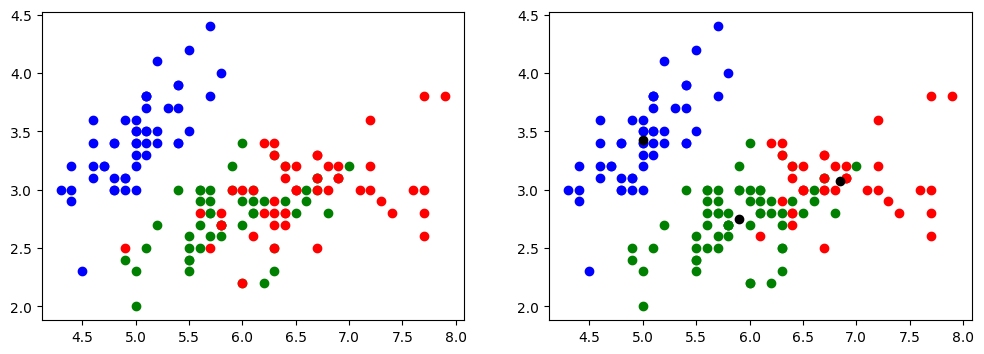

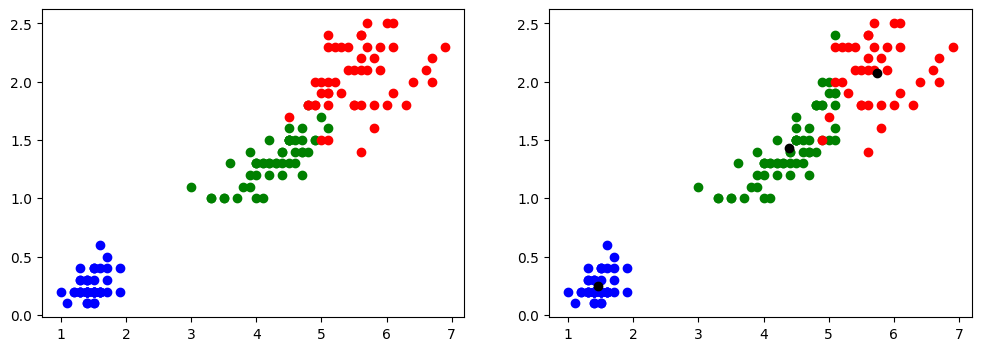

In [9]:
fig1, (sub1,sub2) = plt.subplots(nrows=1,ncols=2,figsize=(12,4))
sub1.scatter(df_target_0['sepal length (cm)'],df_target_0['sepal width (cm)'],color='blue')
sub1.scatter(df_target_1['sepal length (cm)'],df_target_1['sepal width (cm)'],color='green')
sub1.scatter(df_target_2['sepal length (cm)'],df_target_2['sepal width (cm)'],color='red')

sub2.scatter(df_cluster_0['sepal length (cm)'],df_cluster_0['sepal width (cm)'],color='blue')
sub2.scatter(df_cluster_1['sepal length (cm)'],df_cluster_1['sepal width (cm)'],color='green')
sub2.scatter(df_cluster_2['sepal length (cm)'],df_cluster_2['sepal width (cm)'],color='red')
sub2.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='black')

fig2, (sub1,sub2) = plt.subplots(ncols=2,figsize=(12,4))
sub1.scatter(df_target_0['petal length (cm)'],df_target_0['petal width (cm)'],color='blue')
sub1.scatter(df_target_1['petal length (cm)'],df_target_1['petal width (cm)'],color='green')
sub1.scatter(df_target_2['petal length (cm)'],df_target_2['petal width (cm)'],color='red')

sub2.scatter(df_cluster_0['petal length (cm)'],df_cluster_0['petal width (cm)'],color='blue')
sub2.scatter(df_cluster_1['petal length (cm)'],df_cluster_1['petal width (cm)'],color='green')
sub2.scatter(df_cluster_2['petal length (cm)'],df_cluster_2['petal width (cm)'],color='red')
sub2.scatter(km.cluster_centers_[:,2],km.cluster_centers_[:,3],color='black')

[681.3706, 152.34795176035792, 78.85144142614601, 57.228473214285714, 46.44618205128205, 39.226244101244106, 34.29971212121212, 30.357081041507513, 28.271721728563833]


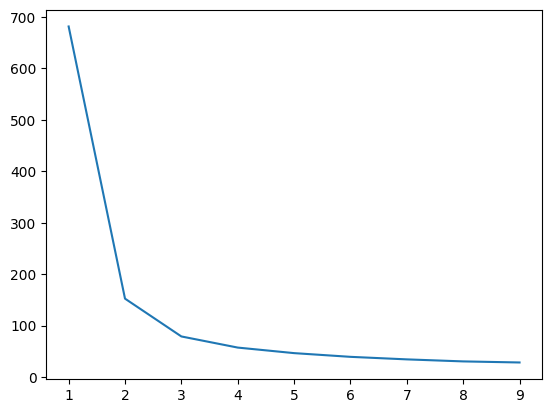

In [11]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit_predict(iris.data)
    sse.append(km.inertia_)

print(sse)
plt.plot(k_rng,sse)